In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'scikit-learn/scikit-learn'

In [4]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'compare': 'title + body'})
df.head()

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",411,sbert,3,0,1,[sklearn/cross_validation.py],"[doc/whats_new.rst, sklearn/svm/src/libsvm/lib...",2011-10-22T09:45:17Z,3,permutation_test_score possibly broken,0.0,0.336149,0.266538,0.260079,scikit-learn/scikit-learn
1,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",411,sbert,5,0,1,[sklearn/cross_validation.py],"[doc/whats_new.rst, sklearn/svm/src/libsvm/lib...",2011-10-22T09:45:17Z,5,permutation_test_score possibly broken,0.0,0.336149,0.260079,-0.000683,scikit-learn/scikit-learn
2,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",533,sbert,3,0,2,"[sklearn/linear_model/base.py, sklearn/linear_...","[doc/whats_new.rst, sklearn/svm/src/libsvm/lib...",2012-01-06T06:37:55Z,4,LinearRegression does not work with sparse matrix,0.0,0.489269,0.319574,0.295966,scikit-learn/scikit-learn
3,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",533,sbert,5,0,2,"[sklearn/linear_model/base.py, sklearn/linear_...","[doc/whats_new.rst, sklearn/svm/src/libsvm/lib...",2012-01-06T06:37:55Z,6,LinearRegression does not work with sparse matrix,0.0,0.489269,0.295966,0.233711,scikit-learn/scikit-learn
4,title + body,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",691,sbert,3,0,2,"[sklearn/metrics/metrics.py, sklearn/metrics/t...","[sklearn/cross_validation.py, doc/whats_new.rs...",2012-03-14T06:16:52Z,3,metrics.auc bug,0.0,0.418732,0.393884,0.358341,scikit-learn/scikit-learn


# Histplot


<Axes: xlabel='number', ylabel='Count'>

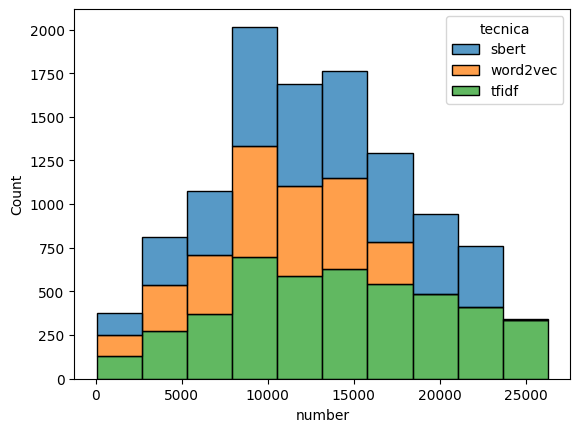

In [5]:
sns.histplot(df, x='number', bins=10, stat='count', hue='tecnica', multiple='stack')

# Mapk

<Axes: xlabel='topk', ylabel='mapk'>

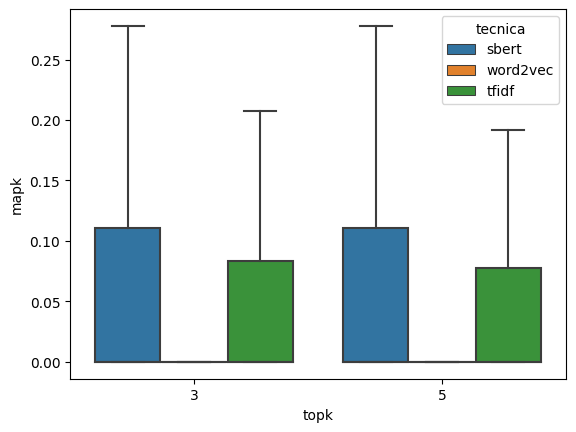

In [6]:
sns.boxplot(df, x="topk", y="mapk", hue="tecnica", showfliers=False)

# Similaridades maiores

<Axes: xlabel='topk', ylabel='max_sim'>

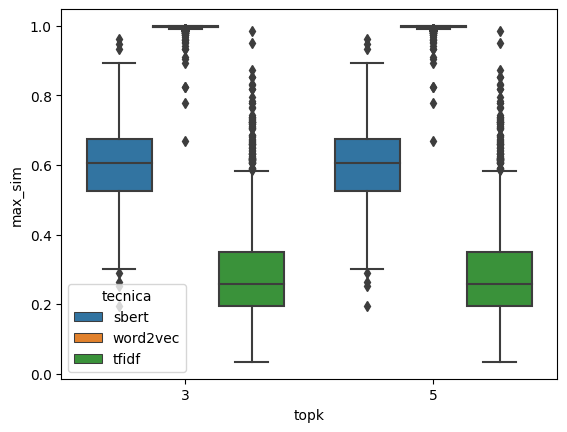

In [7]:
sns.boxplot(df, x="topk", y="max_sim", hue="tecnica")

# Similaridades menores

<Axes: xlabel='topk', ylabel='min_sim'>

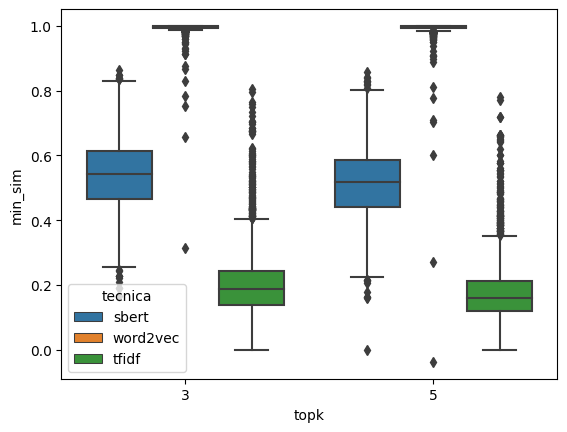

In [8]:
sns.boxplot(df, x="topk", y="min_sim", hue="tecnica")

# Acertos

<Axes: xlabel='topk', ylabel='acertos'>

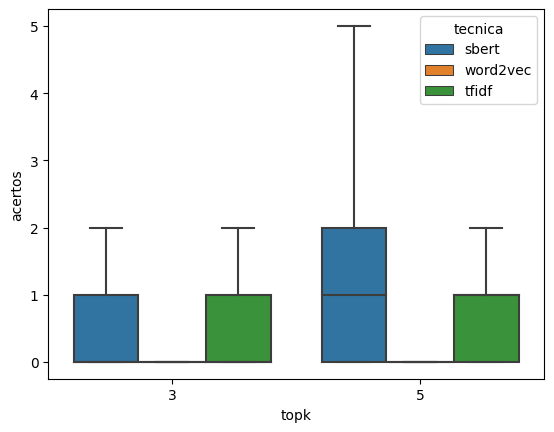

In [9]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

<Axes: xlabel='topk', ylabel='acertos'>

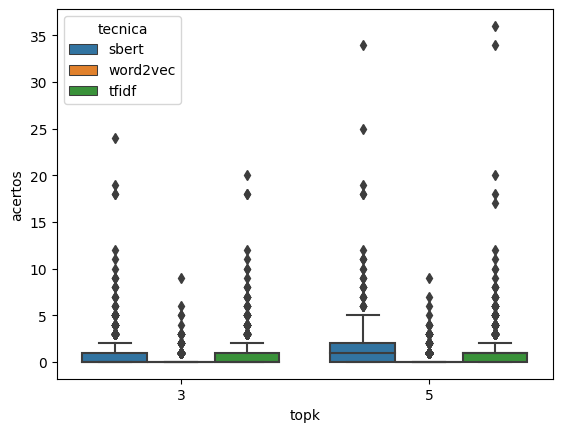

In [11]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=True)